In [1]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm_drop.xlsx")


In [2]:
data_main

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",Force_C(Left).1
0,0,0.000000,0.000000,0.461877
1,1,0.000000,0.000000,0.461877
2,2,0.000000,0.000000,0.461877
3,3,0.000000,0.000000,0.461877
4,4,0.000000,0.000000,0.461877
...,...,...,...,...
596,596,0.064085,0.032817,0.266862
597,597,0.035381,0.020055,0.260330
598,598,0.010681,0.000000,0.260330
599,599,0.004005,0.000000,0.260330


In [3]:
data

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",Force_C(Left).1
0,0,0.000000,0.000000,0.461877
1,1,0.000000,0.000000,0.461877
2,2,0.000000,0.000000,0.461877
3,3,NaN,NaN,NaN
4,4,0.000000,0.000000,0.461877
...,...,...,...,...
596,596,0.064085,0.032817,0.266862
597,597,NaN,NaN,NaN
598,598,0.010681,0.000000,0.260330
599,599,0.004005,0.000000,0.260330


In [4]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

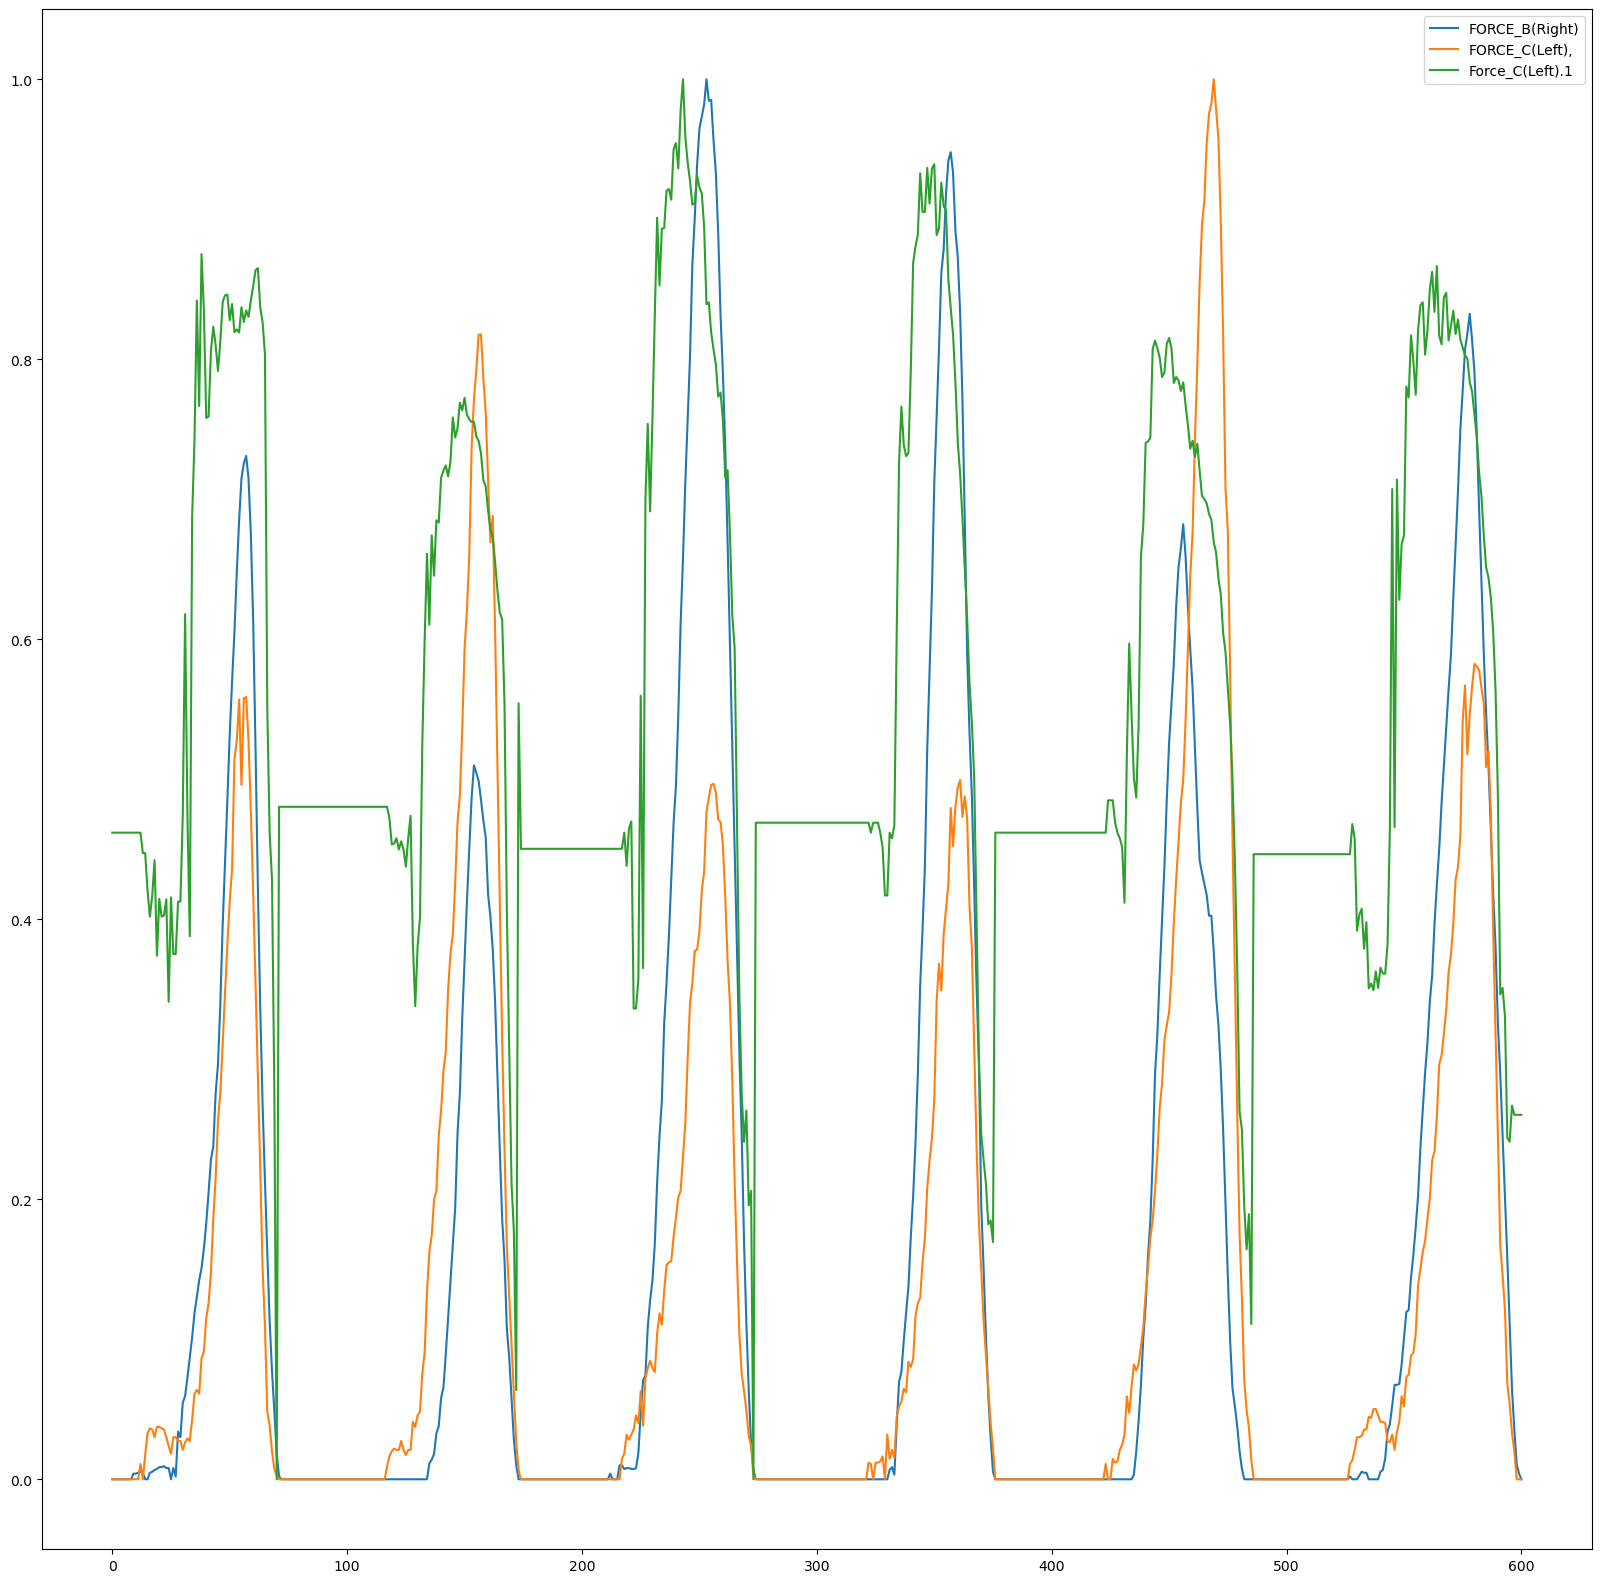

In [5]:
data_main.plot(figsize=(20,20))

<Axes: >

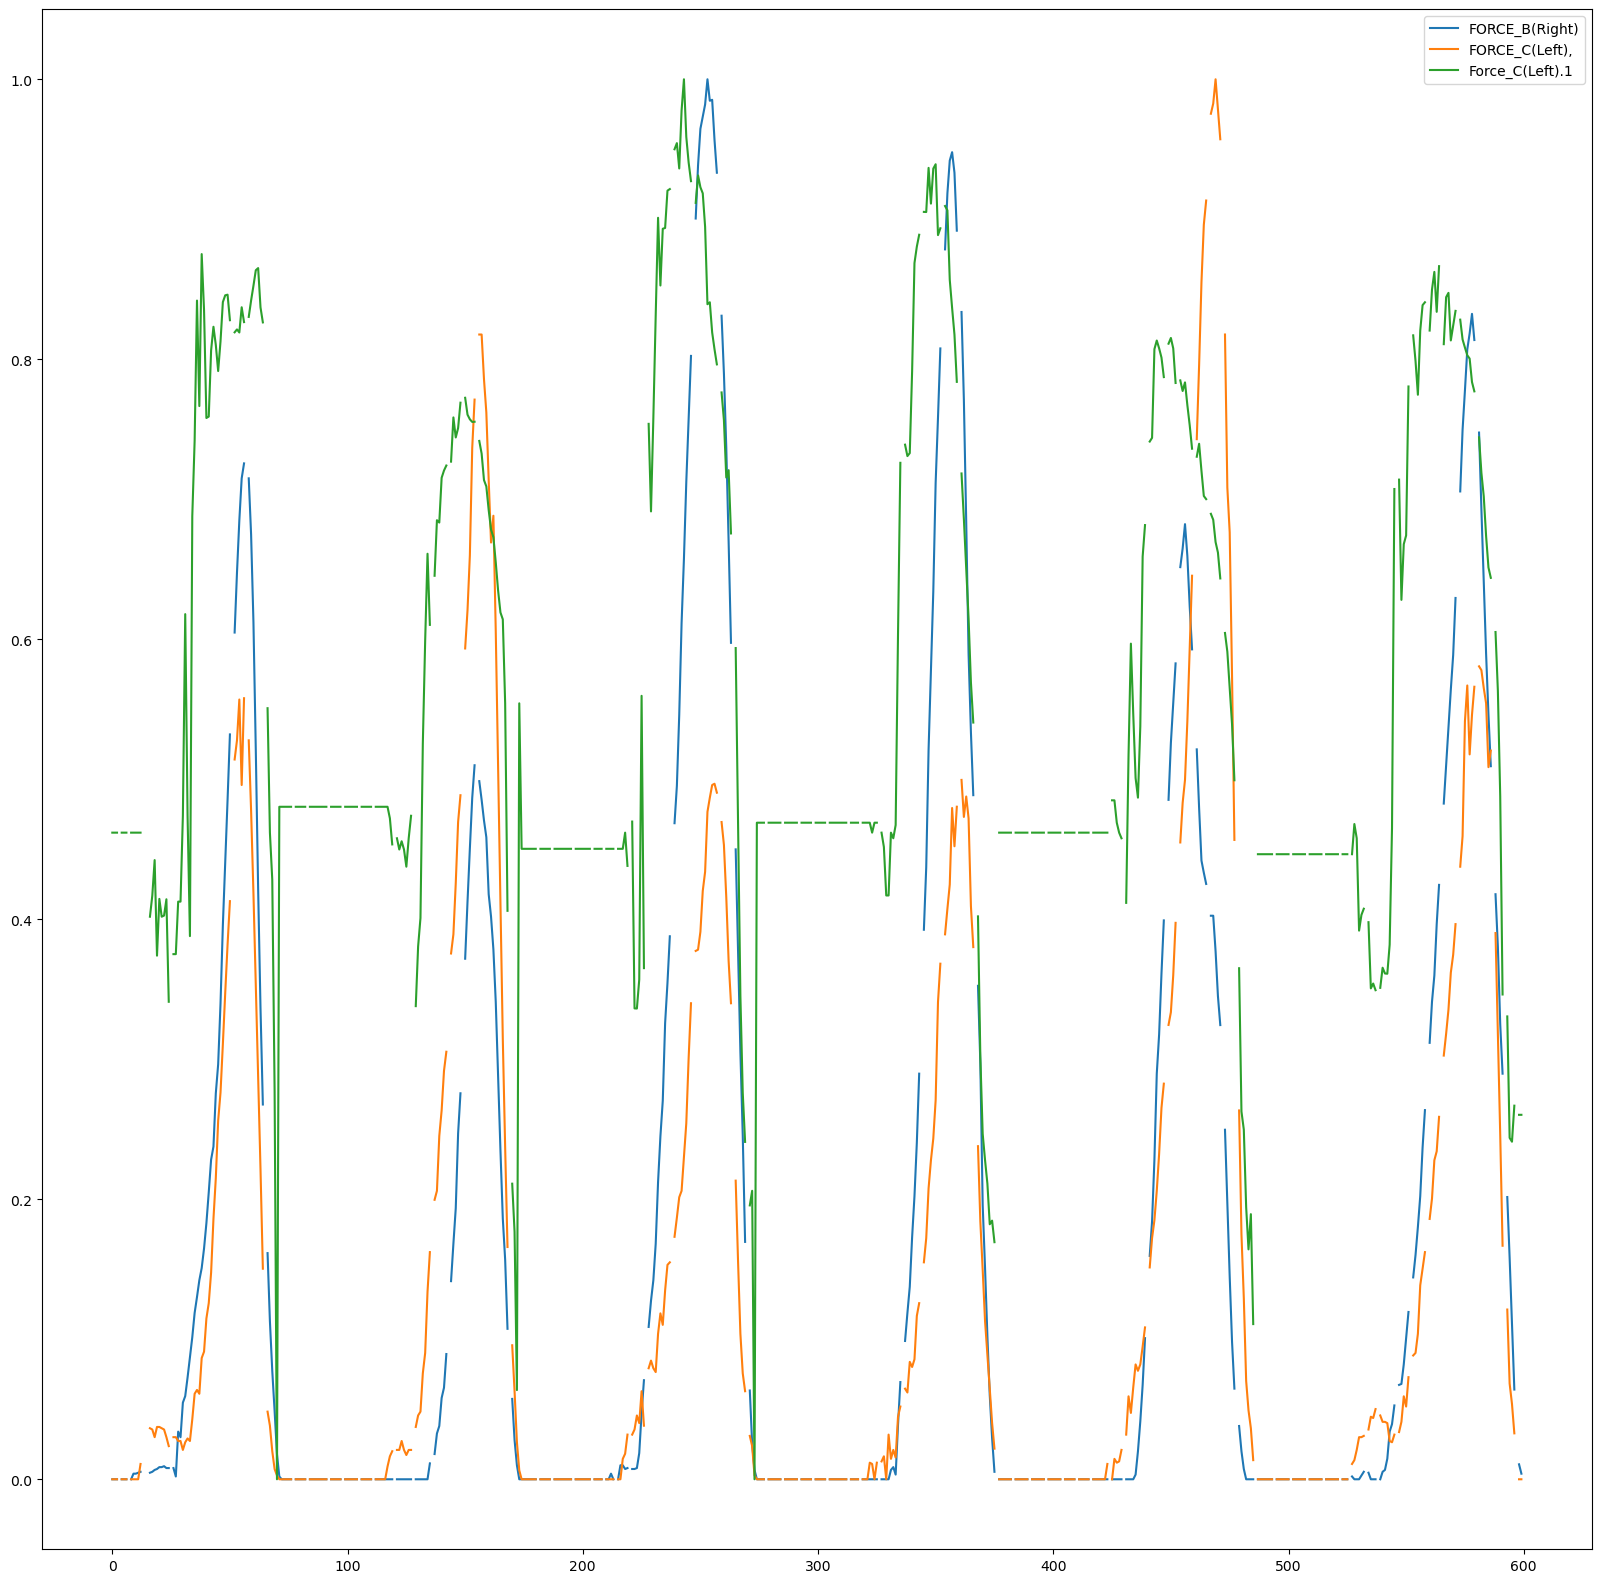

In [6]:
data.plot(figsize=(20,20))

In [7]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)     82
FORCE_C(Left),     82
Force_C(Left).1    82
dtype: int64
FORCE_B(Right)     0
FORCE_C(Left),     0
Force_C(Left).1    0
dtype: int64


FORCE_B(Right)


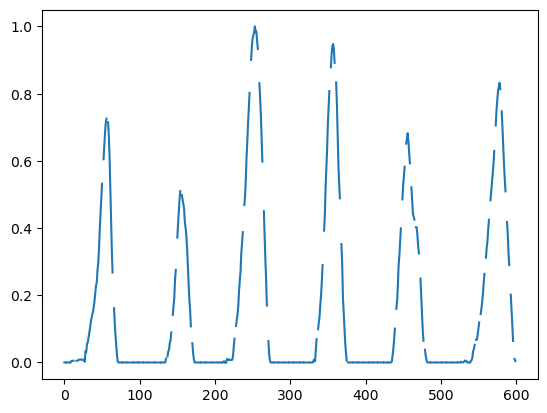

FORCE_C(Left),


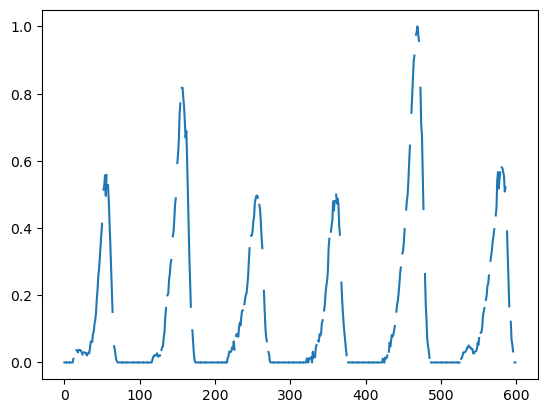

Force_C(Left).1


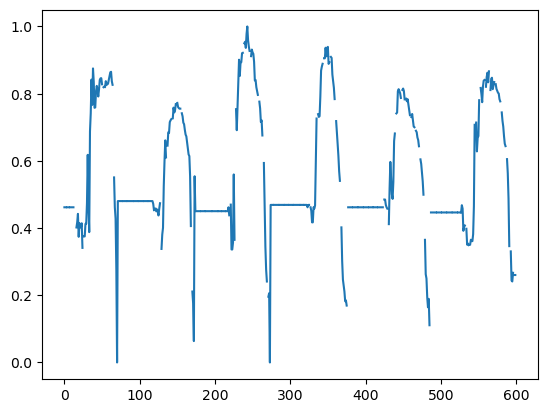

In [8]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [9]:
## R_FORCE_B : FORCE_C(Left),
## R_FORCE_B : Force_C(Left).1

In [10]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm.xlsx")
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)"],inplace=True)




In [11]:
data_sca.columns

Index(['FORCE_C(Left),', 'Force_C(Left).1'], dtype='object')

In [12]:
from sklearn.preprocessing import MinMaxScaler



scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(data_sca)
L_scaled=pd.DataFrame(data=R_scaled)





In [13]:
L_scaled

,0,1
0,0.000000,0.461877
1,0.000000,0.461877
2,0.000000,0.461877
3,0.000000,0.461877
4,0.000000,0.461877
...,...,...
596,0.032817,0.266862
597,0.020055,0.260330
598,0.000000,0.260330
599,0.000000,0.260330


In [14]:
L_new=L_scaled.set_axis(["FORCE_C(Left),","Force_C(Left).1"],axis="columns")



In [15]:
R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','Force_C(Left).1']]

<Axes: >

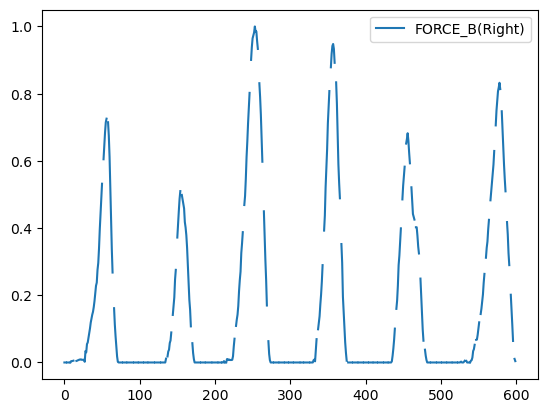

In [16]:
R.plot()

<Axes: >

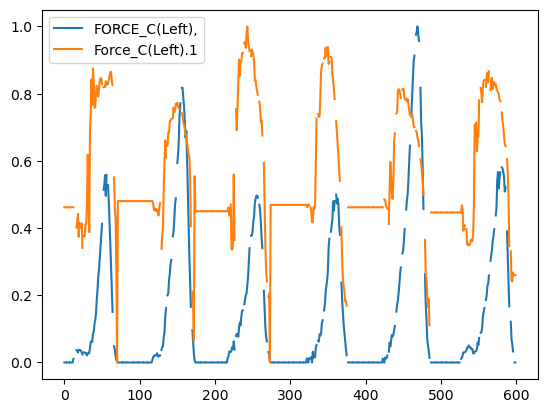

In [17]:
L.plot()

In [18]:
import numpy as np

index=R.index

loss_index_R_FORCE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORCE_B=np.setdiff1d(index,loss_index_R_FORCE_B)


In [19]:
index=L.index

loss_index_L_FORCE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FORCE1_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORCE_C=np.setdiff1d(index,loss_index_L_FORCE_C)
normal_index_L_FORCE1_C=np.setdiff1d(index,loss_index_L_FORCE1_C)

In [20]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [21]:
x_train_R_FORCE_B=normal_index_R_FORCE_B.reshape(-1,1)
y_train_L_FORCE_C=L.iloc[normal_index_L_FORCE_C,0]
x_test_L_FORCE_C=loss_index_L_FORCE_C

y_train_L_FORCE1_C=L.iloc[normal_index_L_FORCE1_C,1]
x_test_L_FORCE1_C=loss_index_L_FORCE1_C

L_FORCE_C=L.iloc[:,0].copy()
L_FORCE1_C=L.iloc[:,1].copy()

In [22]:
print(x_train_R_FORCE_B.shape)
print(y_train_L_FORCE_C.shape)

(519, 1)
(519,)


In [23]:
x_train_R_FORCE_B=x_train_R_FORCE_B.reshape(x_train_R_FORCE_B.shape[0],x_train_R_FORCE_B.shape[1],1)
x_test_L_FORCE_C=x_test_L_FORCE_C.reshape(x_test_L_FORCE_C.shape[0],x_test_L_FORCE_C.shape[1],1)
x_test_L_FORCE1_C=x_test_L_FORCE1_C.reshape(x_test_L_FORCE1_C.shape[0],x_test_L_FORCE1_C.shape[1],1)

In [24]:
print(x_test_L_FORCE1_C.shape)
print(x_test_L_FORCE_C.shape)

(82, 1, 1)
(82, 1, 1)


In [25]:
#[I 2023-11-20 11:43:21,847] Trial 9 finished with value: 0.04988968195127354 and parameters: {'batch_size': 80, 'steps_per_epoch': 2, 'epochs': 5882, 'filter': 185, 'lstm_par1': 166, 'lstm_par2': 196, 'lstm_par3': 115, 'lstm_par4': 116, 'dense_par': 38, 'drop1': 0.011735017871977216, 'drop2': 0.018762971540496567, 'drop3': 0.048499042203166746, 'drop4': 0.08695407881342482}. Best is trial 9 with value: 0.04988968195127354.
#{'batch_size': 80, 'steps_per_epoch': 2, 'epochs': 5882, 'filter': 185, 'lstm_par1': 166, 'lstm_par2': 196, 'lstm_par3': 115, 'lstm_par4': 116, 'dense_par': 38, 'drop1': 0.011735017871977216, 'drop2': 0.018762971540496567, 'drop3': 0.048499042203166746, 'drop4': 0.08695407881342482}

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Bidirectional

model_cnnbilstm = Sequential()
model_cnnbilstm.add(TimeDistributed(Conv1D(filters=185, kernel_size=1, activation='relu',padding='same'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnnbilstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Bidirectional(LSTM(166, return_sequences=True,dropout=0.011735017871977216,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(196, return_sequences=True,dropout=0.018762971540496567,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(115, return_sequences=True,dropout=0.048499042203166746,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(116, return_sequences=True,dropout=0.08695407881342482,activation='relu')))
model_cnnbilstm.add(TimeDistributed(Dense(10, activation='relu')))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Dense(1))
model_cnnbilstm.compile(loss='mse', optimizer='adam')
model_cnnbilstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, None, 1, 185)     370       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, None, 1, 185)     0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, None, 185)        0         
 tributed)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, None, 332)        467456    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 392)       

In [29]:
model_cnnbilstm.fit(x_train_R_FORCE_B,y_train_L_FORCE_C,epochs=10000,verbose=2,batch_size=80,steps_per_epoch=2)
pred=model_cnnbilstm.predict(x_test_L_FORCE_C)
pred=pred.reshape(-1,1)

Epoch 1/10000


2023-11-20 11:52:23.107878: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 - 4s - loss: 0.0673 - 4s/epoch - 2s/step
Epoch 2/10000
2/2 - 0s - loss: 0.0559 - 36ms/epoch - 18ms/step
Epoch 3/10000
2/2 - 0s - loss: 0.0461 - 24ms/epoch - 12ms/step
Epoch 4/10000
2/2 - 0s - loss: 0.0449 - 19ms/epoch - 10ms/step
Epoch 5/10000
2/2 - 0s - loss: 0.0403 - 21ms/epoch - 11ms/step
Epoch 6/10000
2/2 - 0s - loss: 0.0643 - 21ms/epoch - 11ms/step
Epoch 7/10000
2/2 - 0s - loss: 0.0449 - 20ms/epoch - 10ms/step
Epoch 8/10000
2/2 - 0s - loss: 0.0445 - 22ms/epoch - 11ms/step
Epoch 9/10000
2/2 - 0s - loss: 0.0593 - 22ms/epoch - 11ms/step
Epoch 10/10000
2/2 - 0s - loss: 0.0512 - 23ms/epoch - 11ms/step
Epoch 11/10000
2/2 - 0s - loss: 0.0598 - 20ms/epoch - 10ms/step
Epoch 12/10000
2/2 - 0s - loss: 0.0361 - 24ms/epoch - 12ms/step
Epoch 13/10000
2/2 - 0s - loss: 0.0425 - 19ms/epoch - 10ms/step
Epoch 14/10000
2/2 - 0s - loss: 0.0638 - 18ms/epoch - 9ms/step
Epoch 15/10000
2/2 - 0s - loss: 0.0511 - 23ms/epoch - 12ms/step
Epoch 16/10000
2/2 - 0s - loss: 0.0463 - 20ms/epoch - 10ms/step
Epoc

In [30]:
c=0
for i in loss_index_L_FORCE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

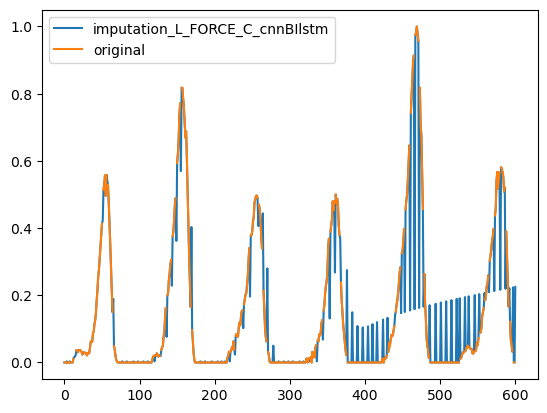

In [31]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_L_FORCE_C_cnnBIlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [32]:
#[I 2023-11-19 16:09:55,208] Trial 16 finished with value: 0.059228753242808206 and parameters: {'batch_size': 91, 'steps_per_epoch': 2, 'epochs': 3199, 'filter': 10, 'lstm_par1': 187, 'lstm_par4': 210, 'dense_par': 214, 'drop1': 0.16110724710397403, 'drop4': 0.2978985267212615}. Best is trial 16 with value: 0.059228753242808206.


In [33]:
model_cnnbilstm = Sequential()
model_cnnbilstm.add(TimeDistributed(Conv1D(filters=185, kernel_size=1, activation='relu',padding='same'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnnbilstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Bidirectional(LSTM(166, return_sequences=True,dropout=0.011735017871977216,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(196, return_sequences=True,dropout=0.018762971540496567,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(115, return_sequences=True,dropout=0.048499042203166746,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(116, return_sequences=True,dropout=0.08695407881342482,activation='relu')))
model_cnnbilstm.add(TimeDistributed(Dense(10, activation='relu')))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Dense(1))
model_cnnbilstm.compile(loss='mse', optimizer='adam')
model_cnnbilstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_5 (TimeDis  (None, None, 1, 185)     370       
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, None, 1, 185)     0         
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, None, 185)        0         
 tributed)                                                       
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 332)        467456    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, None, 392)       

In [34]:
model_cnnbilstm.fit(x_train_R_FORCE_B,y_train_L_FORCE1_C,epochs=10000,verbose=2,batch_size=80,steps_per_epoch=2)

Epoch 1/10000
2/2 - 4s - loss: 0.2601 - 4s/epoch - 2s/step
Epoch 2/10000
2/2 - 0s - loss: 0.2961 - 59ms/epoch - 29ms/step
Epoch 3/10000
2/2 - 0s - loss: 0.1182 - 53ms/epoch - 26ms/step
Epoch 4/10000
2/2 - 0s - loss: 0.1106 - 26ms/epoch - 13ms/step
Epoch 5/10000
2/2 - 0s - loss: 0.1015 - 26ms/epoch - 13ms/step
Epoch 6/10000
2/2 - 0s - loss: 0.0653 - 29ms/epoch - 14ms/step
Epoch 7/10000
2/2 - 0s - loss: 0.0898 - 34ms/epoch - 17ms/step
Epoch 8/10000
2/2 - 0s - loss: 0.0567 - 36ms/epoch - 18ms/step
Epoch 9/10000
2/2 - 0s - loss: 0.0474 - 28ms/epoch - 14ms/step
Epoch 10/10000
2/2 - 0s - loss: 0.0460 - 27ms/epoch - 14ms/step
Epoch 11/10000
2/2 - 0s - loss: 0.0387 - 22ms/epoch - 11ms/step
Epoch 12/10000
2/2 - 0s - loss: 0.0451 - 28ms/epoch - 14ms/step
Epoch 13/10000
2/2 - 0s - loss: 0.0427 - 26ms/epoch - 13ms/step
Epoch 14/10000
2/2 - 0s - loss: 0.0431 - 23ms/epoch - 12ms/step
Epoch 15/10000
2/2 - 0s - loss: 0.0413 - 25ms/epoch - 12ms/step
Epoch 16/10000
2/2 - 0s - loss: 0.0522 - 26ms/epoch -

In [35]:
pred=model_cnnbilstm.predict(x_test_L_FORCE1_C)
pred=pred.reshape(-1,1)

3/3 [==============================] - 1s 4ms/step


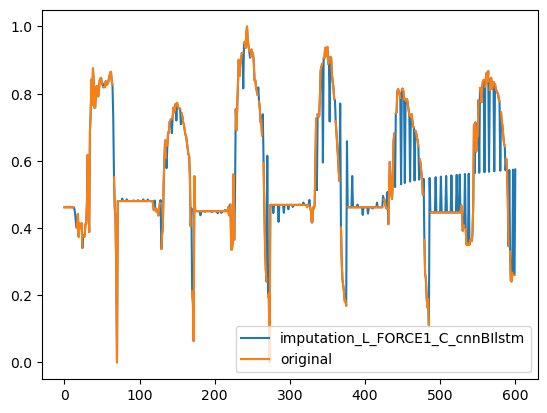

In [36]:
c=0
for i in loss_index_L_FORCE1_C:    
    L_FORCE1_C[i]=pred[c]
    c+=1
    
    #
plt.plot(L_FORCE1_C,label='imputation_L_FORCE1_C_cnnBIlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [37]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['FORCE_C(Left),'],L_FORCE_C))
print(RMSE(data_main['Force_C(Left).1'],L_FORCE1_C))

0.06907852364482024
0.050601421760172176


In [38]:
L.isnull().sum()

FORCE_C(Left),     82
Force_C(Left).1    82
dtype: int64

In [41]:
for i in loss_index_L_FORCE_C:    
    L['FORCE_C(Left),'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FORCE1_C:    
    L['Force_C(Left).1'][i]=L_FORCE1_C[i]

In [42]:
L.isnull().sum()

FORCE_C(Left),     0
Force_C(Left).1    0
dtype: int64

<Axes: >

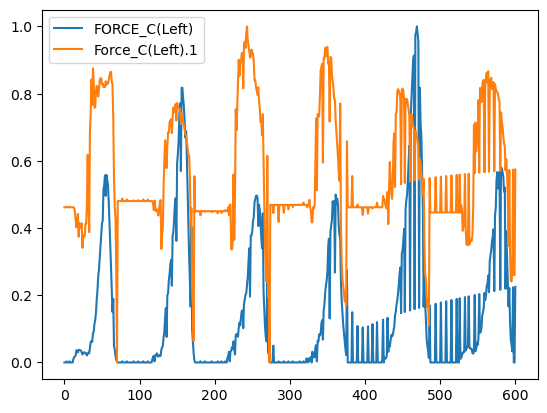

In [43]:
L=L.set_axis(["FORCE_C(Left)","Force_C(Left).1"],axis="columns")
L.plot()

<Axes: >

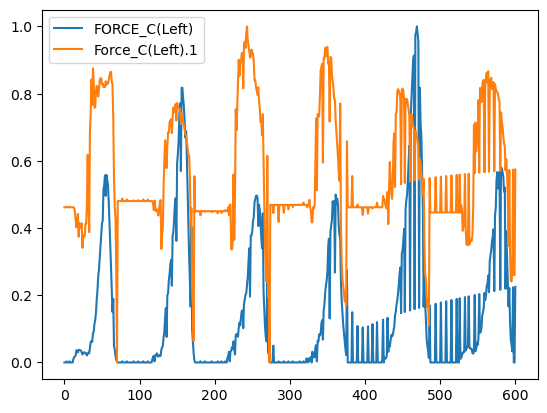

In [44]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","Force_C(Left).1"],axis="columns")
L_sca.plot()